In [15]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [119]:


def pol2cart(deg,r):
    """
    convert angle from deg, r to x, y
    """
    x = r * np.sin(np.deg2rad(deg))
    y = r * np.cos(np.deg2rad(deg))
    return x, y
    

In [120]:

deg, lag = np.meshgrid(np.linspace(-180,180,91),
                       np.arange(-10*2,11*2,4).astype(int))
positions = np.vstack((deg.ravel(),lag.ravel()))
values = positions
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T,deg.shape)

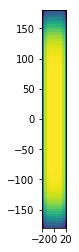

In [121]:
xmin=lag.min()
xmax=lag.max()
ymin=deg.min()
ymax=deg.max()

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap='viridis',extent=[xmin, xmax, ymin, ymax])
# ax.plot(lag, deg, 'k.', markersize=2)
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
plt.show()


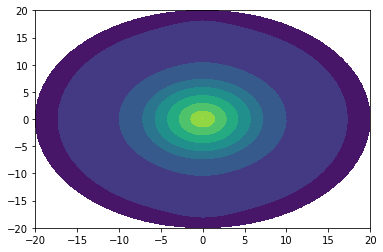

In [130]:
x,y = pol2cart(2*deg,lag)

xmin=x.min()
xmax=x.max()
ymin=y.min()
ymax=y.max()

positions = np.vstack((x.ravel(),y.ravel()))
values = positions
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions),x.shape)

fig, ax = plt.subplots()
plt.contourf(x,y,Z, cmap='viridis',extent=[xmin, xmax, ymin, ymax])
# ax.plot(x, y, 'k.', markersize=2)
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
plt.show()

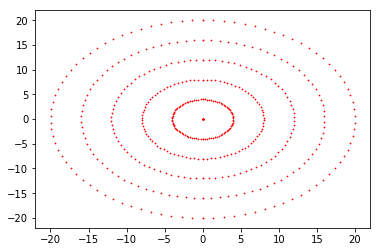

In [123]:
plt.plot(x.ravel(),y.ravel(),'ro',ms=.5)

In [103]:
lag.ravel().shape

(3801,)

In [66]:
lag

array([[-40, -40, -40, ..., -40, -40, -40],
       [-38, -38, -38, ..., -38, -38, -38],
       [-36, -36, -36, ..., -36, -36, -36],
       ..., 
       [ 74,  74,  74, ...,  74,  74,  74],
       [ 76,  76,  76, ...,  76,  76,  76],
       [ 78,  78,  78, ...,  78,  78,  78]])

In [128]:
lag.size

1001

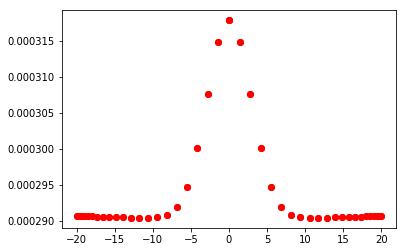

In [137]:
plt.plot(x[0,:],Z[0,:],'ro')

In [12]:
def rho(n,step):
    if n == 0:
        return 1 / (np.pi/4 * step**2)
    elif n > 0:
        return 1 / (2 * np.pi * n * step)
    else:
        raise Exception('n not valid')
        
rho = np.vectorize(rho)

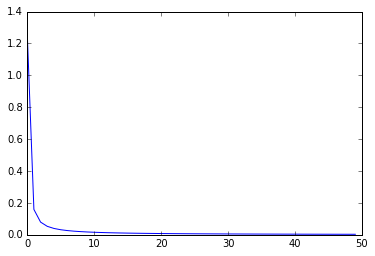

In [16]:
lags = np.arange(50)
rhos = rho(lags,1)
plt.plot(lags,rhos)